In [121]:
# Import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("./Datasets/heart.csv")
df2 = pd.read_csv("./Datasets/diabetes.csv")

# Heart Disease Prediction

In [122]:
df1.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [123]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [124]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [125]:
df1 = df1[['age', 'trestbps', 'chol', 'thalach', 'target']]

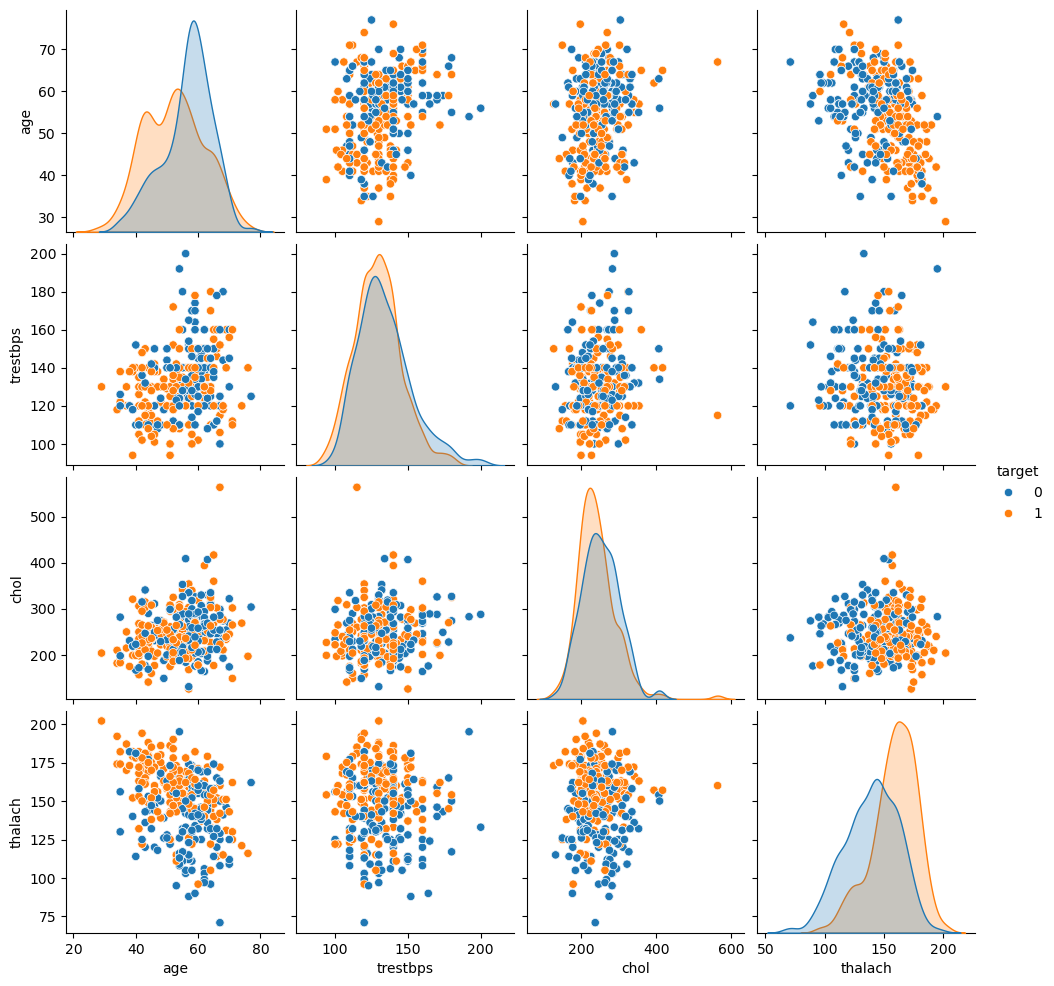

In [126]:
sns.pairplot(df1, hue='target')
plt.show()

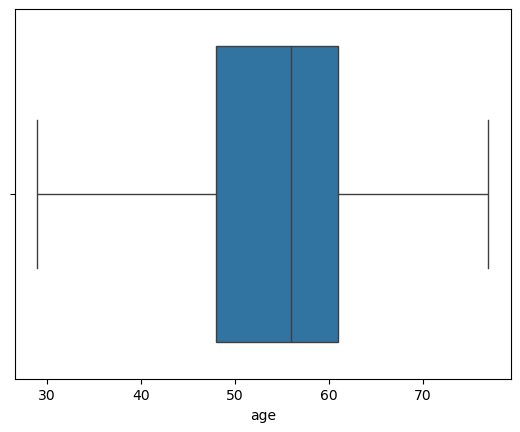

In [127]:
sns.boxplot(x='age', data=df1)
plt.show()

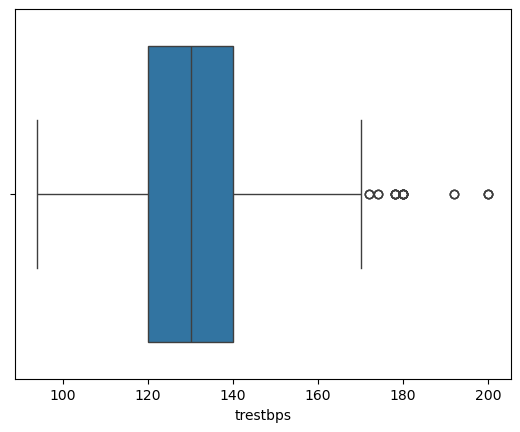

In [128]:
sns.boxplot(x='trestbps', data=df1)
plt.show()

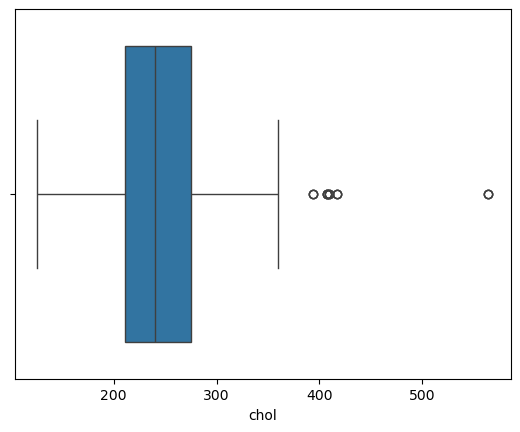

In [129]:
sns.boxplot(x='chol', data=df1)
plt.show()

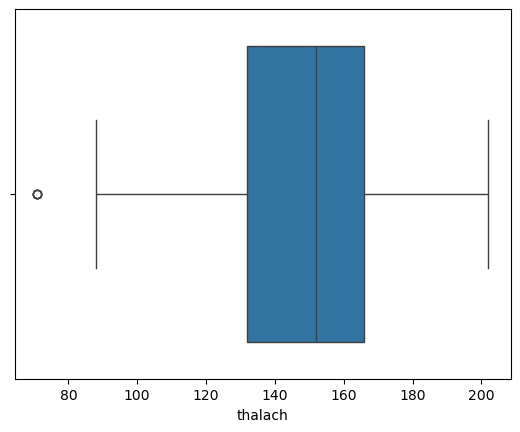

In [130]:
sns.boxplot(x='thalach', data=df1)
plt.show()

In [131]:
df1.shape

(1025, 5)

In [132]:
min_range = df1["trestbps"].mean() - (3*df1["trestbps"].std())
max_range = df1["trestbps"].mean() + (3*df1["trestbps"].std())

min_range, max_range

(np.float64(79.06155330094396), np.float64(184.1618613332024))

In [133]:
df1 = df1[df1["trestbps"] <= max_range]

In [134]:
min_range = df1["chol"].mean() - (3*df1["chol"].std())
max_range = df1["chol"].mean() + (3*df1["chol"].std())

min_range, max_range

(np.float64(90.7371943775369), np.float64(400.71467202717827))

In [135]:
df1 = df1[df1["chol"] <= max_range]

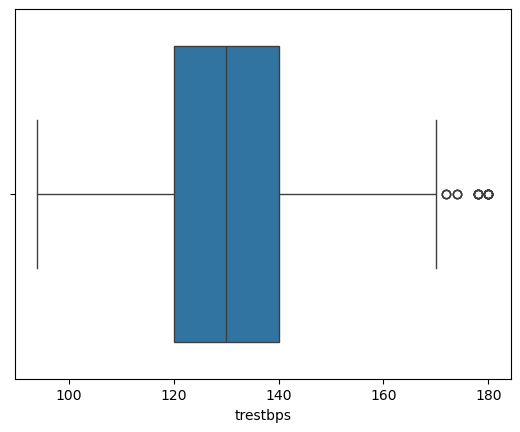

In [136]:
sns.boxplot(x='trestbps', data=df1)
plt.show()

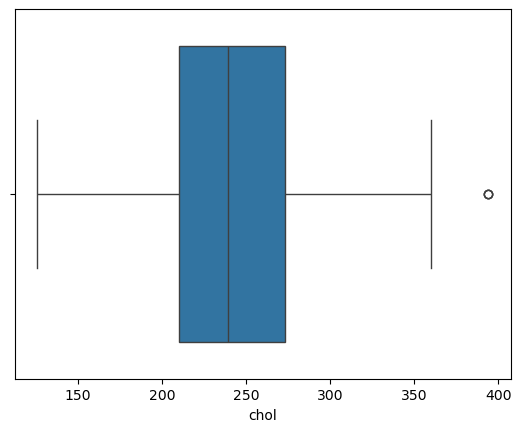

In [137]:
sns.boxplot(x='chol', data=df1)
plt.show()

In [138]:
df1.shape

(1005, 5)

In [139]:
x = df1.iloc[:,:-1]
y = df1['target']

In [140]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Define base models
clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier()
clf4 = SVC(probability=True)  # probability=True needed for soft voting

# Create Voting Classifier
mv1 = VotingClassifier(estimators=[
    ('lr', clf1),
    ('nb', clf2),
    ('dt', clf3),
    ('svc', clf4)
], voting='soft')  # 'hard' for majority vote, 'soft' for averaged probabilities

# Fit the ensemble
mv1.fit(x_train, y_train)

,estimators,"[('lr', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [142]:
mv1.score(x_test, y_test)

0.8606965174129353

In [167]:
import pickle

# Save the trained model to a file
with open("heart_disease_model.pkl", "wb") as f:
    pickle.dump(mv1, f)

# Diabetes Prediction

In [143]:
df2.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [144]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [145]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [146]:
df2 = df2[['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']]

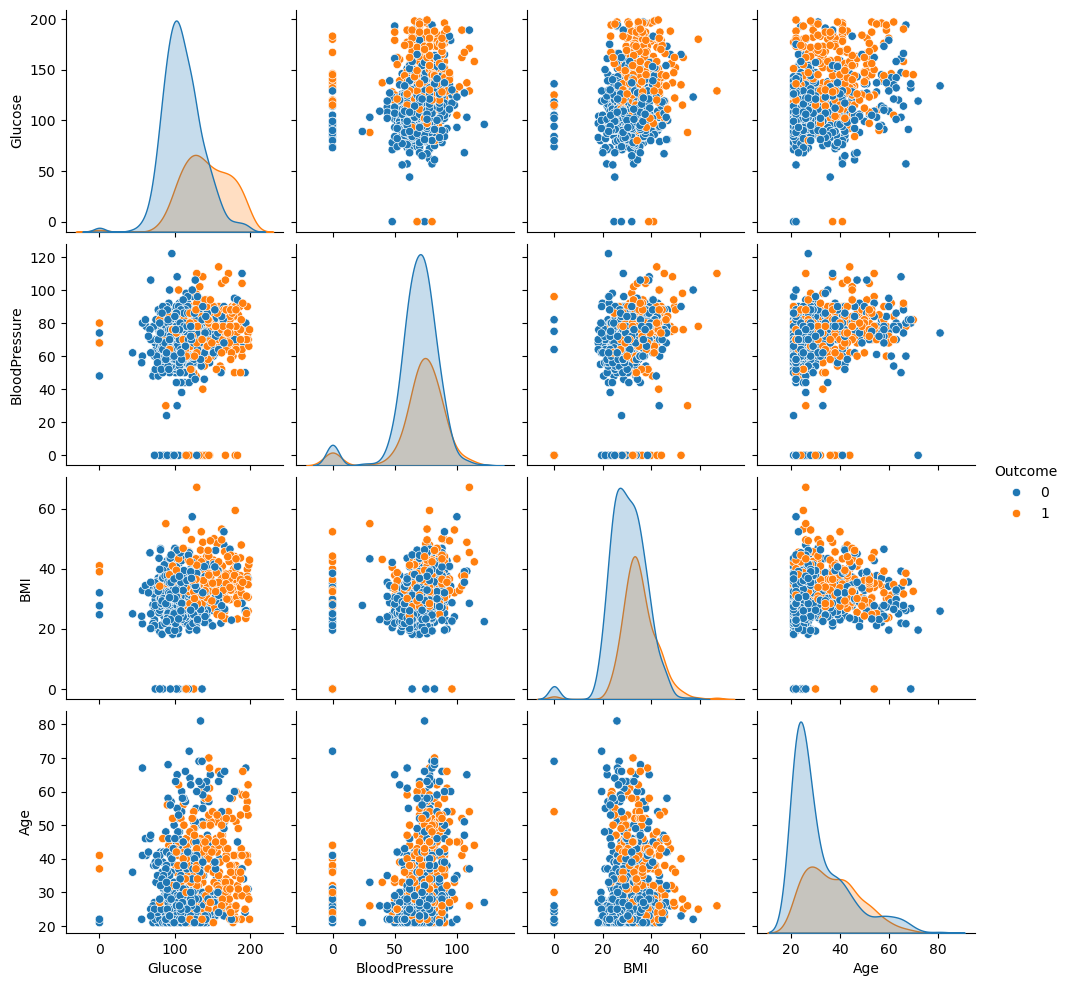

In [147]:
sns.pairplot(df2, hue='Outcome')
plt.show()

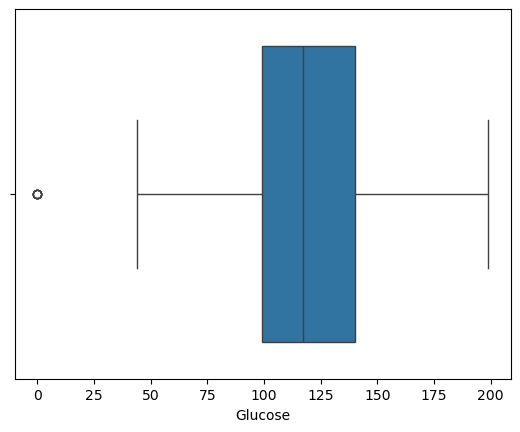

In [148]:
sns.boxplot(x='Glucose', data=df2)
plt.show()

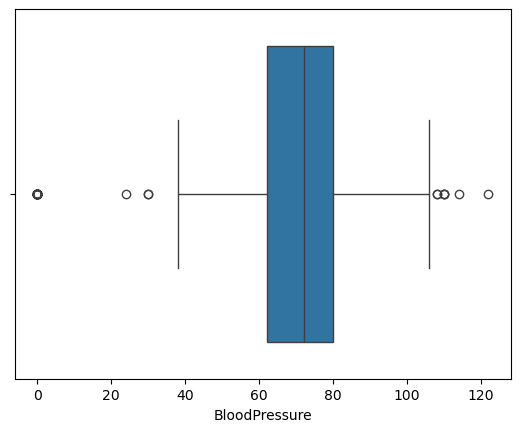

In [149]:
sns.boxplot(x='BloodPressure', data=df2)
plt.show()

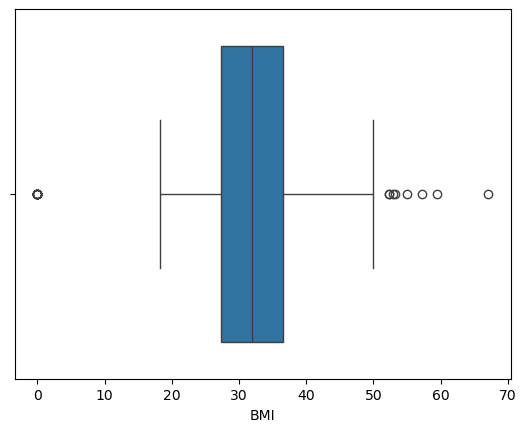

In [150]:
sns.boxplot(x='BMI', data=df2)
plt.show()

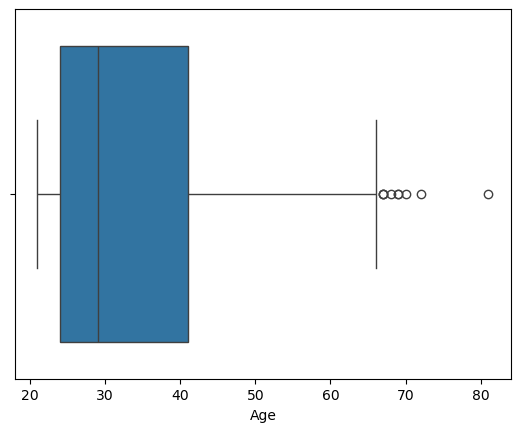

In [151]:
sns.boxplot(x='Age', data=df2)
plt.show()

In [152]:
df2.shape

(768, 5)

In [153]:
min_range = df2["BloodPressure"].mean() - (3*df2["BloodPressure"].std())
max_range = df2["BloodPressure"].mean() + (3*df2["BloodPressure"].std())

min_range, max_range

(np.float64(11.038047238065673), np.float64(127.17289026193433))

In [154]:
df2 = df2[(df2["BloodPressure"] <= max_range) & (df2["BloodPressure"] >= min_range)]

In [155]:
min_range = df2["BMI"].mean() - (3*df2["BMI"].std())
max_range = df2["BMI"].mean() + (3*df2["BMI"].std())

min_range, max_range

(np.float64(10.478150429569709), np.float64(54.10738845173998))

In [156]:
df2 = df2[(df2["BMI"] <= max_range) & (df2["BMI"] >= min_range)]

In [157]:
min_range = df2["Age"].mean() - (3*df2["Age"].std())
max_range = df2["Age"].mean() + (3*df2["Age"].std())

min_range, max_range

(np.float64(-1.9371449486911558), np.float64(68.66817943144977))

In [158]:
df2 = df2[(df2["Age"] <= max_range)]

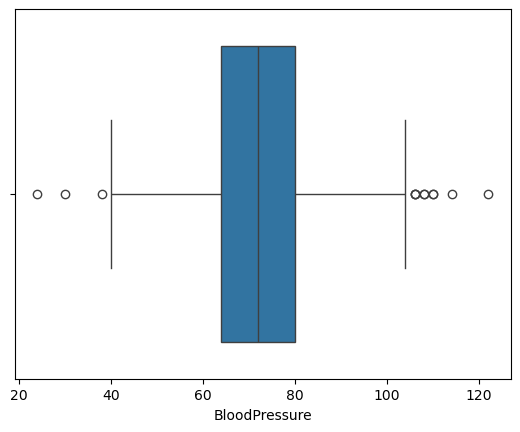

In [159]:
sns.boxplot(x='BloodPressure', data=df2)
plt.show()

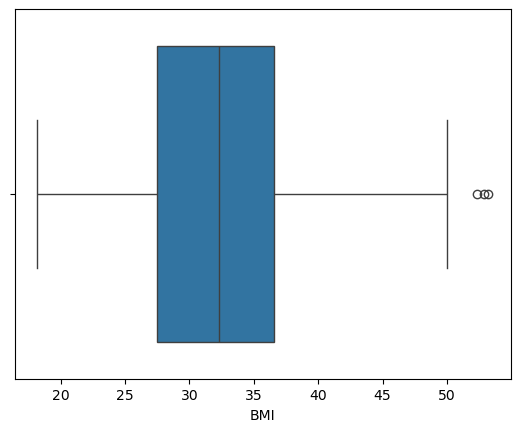

In [160]:
sns.boxplot(x='BMI', data=df2)
plt.show()

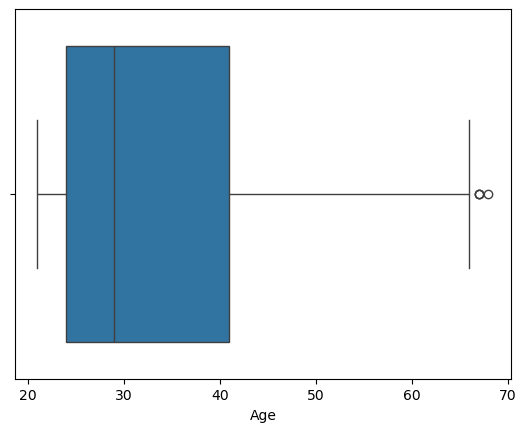

In [161]:
sns.boxplot(x='Age', data=df2)
plt.show()

In [162]:
df2.shape

(722, 5)

In [163]:
x = df2.iloc[:,:-1]
y = df2['Outcome']

In [164]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Define base models
clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier()
clf4 = SVC(probability=True)  # probability=True needed for soft voting

# Create Voting Classifier
mv2 = VotingClassifier(estimators=[
    ('lr', clf1),
    ('nb', clf2),
    ('dt', clf3),
    ('svc', clf4)
], voting='soft')  # 'hard' for majority vote, 'soft' for averaged probabilities

# Fit the ensemble
mv2.fit(x_train, y_train)

,estimators,"[('lr', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [166]:
mv2.score(x_test, y_test)

0.7931034482758621

In [168]:
# Save the trained model to a file
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(mv2, f)